In [1]:
import pandas as pd
from glob import glob
import os
import re
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind, ttest_rel, describe, linregress

In [2]:
species_dict = {'1-SAT_S1' : 'Salmonella enterica', 
                '10-KPN_S9' : 'Klebsiella pneumoniae',
                '2-SAT_S2' : 'Salmonella enterica',
                '4-NTS_S4' : 'Salmonella enterica',
                '7-GC_S7' : 'Neisseria gonorrhoeae'}

In [3]:
pattern = re.compile(r'bbduk\/data\/(.+)_mixed_with_(\d+)%_(.+)_R[1|2]\.')

combined_df = pd.DataFrame()
for file in glob("../../bbduk/data/*.tsv"):
    result = pattern.search(file)
    
    # get species and mixture percent from the filename
    main_species_label = result.group(1)
    percent_contam = int(result.group(2))
    contam_species_label = result.group(3)
    
    # read file into a dataframe
    df = pd.read_csv(file, sep = "\t", header = 3)
    # get rid of # from header line
    df = df.rename(columns = {"#Name": "Name"})

    # filename without suffix
    df['file'] = os.path.basename(file).replace('_R1.fastq_stats_output_filt.tsv', '')
    # determine expected values
    df['expected_main_species'] = species_dict[main_species_label]
    df['expected_contam_species'] = species_dict[contam_species_label]
    df['expected_percent_contam'] = percent_contam
    # get genus and species  of the 'hit' from the data 
    df[['genus', 'species']] = df['Name'].str.extract(r'^N[\w_\.]+\s(\w+)\s(\w+)\s')
    # make full species name
    df['observed_species'] = df['genus'] + " " + df['species'] 
    # get serovar when it exists
    df['observed_serovar'] = df['Name'].str.extract(r'serovar\s(\w+)\s')
    # get observed contamination percent
    df["observed_percent_contam"] = df["ReadsPct"].str.replace('%', '').astype('float')
    # only retain some columns
    df = df.filter(['file', 'expected_main_species', 'expected_contam_species', 'expected_percent_contam', 'observed_species', 'observed_serovar', 'observed_percent_contam'])
    # append to the combined dataframe
    combined_df = combined_df.append(df,  ignore_index=True)
    
    

In [4]:
combined_df


file expected_main_species  \
0    1-SAT_S1_mixed_with_10%_4-NTS_S4   Salmonella enterica   
1    1-SAT_S1_mixed_with_10%_4-NTS_S4   Salmonella enterica   
2    1-SAT_S1_mixed_with_10%_4-NTS_S4   Salmonella enterica   
3    1-SAT_S1_mixed_with_10%_4-NTS_S4   Salmonella enterica   
4     1-SAT_S1_mixed_with_5%_2-SAT_S2   Salmonella enterica   
5     1-SAT_S1_mixed_with_5%_2-SAT_S2   Salmonella enterica   
6     1-SAT_S1_mixed_with_5%_2-SAT_S2   Salmonella enterica   
7     1-SAT_S1_mixed_with_25%_7-GC_S7   Salmonella enterica   
8     1-SAT_S1_mixed_with_25%_7-GC_S7   Salmonella enterica   
9     1-SAT_S1_mixed_with_25%_7-GC_S7   Salmonella enterica   
10    1-SAT_S1_mixed_with_25%_7-GC_S7   Salmonella enterica   
11    1-SAT_S1_mixed_with_5%_4-NTS_S4   Salmonella enterica   
12    1-SAT_S1_mixed_with_5%_4-NTS_S4   Salmonella enterica   
13    1-SAT_S1_mixed_with_5%_4-NTS_S4   Salmonella enterica   
14    1-SAT_S1_mixed_with_5%_4-NTS_S4   Salmonella enterica   
15   1-SAT_S1_mixed_with_10%_2-SAT_S2   Salmonella enterica   
16   1-SAT_S1_mixed_with_10%_2-SAT_S2   Salmonella enterica   
17   1-SAT_S1_mixed_with_10%_2-SAT_S2   Salmonella enterica   
18   1-SAT_S1_mixed_with_1%_10-KPN_S9   Salmonella enterica   
19   1-SAT_S1_mixed_with_1%_10-KPN_S9   Salmonella enterica   
20   1-SAT_S1_mixed_with_1%_10-KPN_S9   Salmonella enterica   
21   1-SAT_S1_mixed_with_1%_10-KPN_S9   Salmonella enterica   
22  1-SAT_S1_mixed_with_25%_10-KPN_S9   Salmonella enterica   
23  1-SAT_S1_mixed_with_25%_10-KPN_S9   Salmonella enterica   
24  1-SAT_S1_mixed_with_25%_10-KPN_S9   Salmonella enterica   
25  1-SAT_S1_mixed_with_25%_10-KPN_S9   Salmonella enterica   
26    1-SAT_S1_mixed_with_10%_7-GC_S7   Salmonella enterica   
27    1-SAT_S1_mixed_with_10%_7-GC_S7   Salmonella enterica   
28    1-SAT_S1_mixed_with_10%_7-GC_S7   Salmonella enterica   
29    1-SAT_S1_mixed_with_10%_7-GC_S7   Salmonella enterica   
30     1-SAT_S1_mixed_with_1%_7-GC_S7   Salmonella enterica   
31     1-SAT_S1_mixed_with_1%_7-GC_S7   Salmonella enterica   
32     1-SAT_S1_mixed_with_1%_7-GC_S7   Salmonella enterica   
33     1-SAT_S1_mixed_with_1%_7-GC_S7   Salmonella enterica   
34   1-SAT_S1_mixed_with_25%_4-NTS_S4   Salmonella enterica   
35   1-SAT_S1_mixed_with_25%_4-NTS_S4   Salmonella enterica   
36   1-SAT_S1_mixed_with_25%_4-NTS_S4   Salmonella enterica   
37   1-SAT_S1_mixed_with_25%_4-NTS_S4   Salmonella enterica   
38     1-SAT_S1_mixed_with_5%_7-GC_S7   Salmonella enterica   
39     1-SAT_S1_mixed_with_5%_7-GC_S7   Salmonella enterica   
40     1-SAT_S1_mixed_with_5%_7-GC_S7   Salmonella enterica   
41     1-SAT_S1_mixed_with_5%_7-GC_S7   Salmonella enterica   
42   1-SAT_S1_mixed_with_25%_2-SAT_S2   Salmonella enterica   
43   1-SAT_S1_mixed_with_25%_2-SAT_S2   Salmonella enterica   
44   1-SAT_S1_mixed_with_25%_2-SAT_S2   Salmonella enterica   
45  1-SAT_S1_mixed_with_10%_10-KPN_S9   Salmonella enterica   
46  1-SAT_S1_mixed_with_10%_10-KPN_S9   Salmonella enterica   
47  1-SAT_S1_mixed_with_10%_10-KPN_S9   Salmonella enterica   
48  1-SAT_S1_mixed_with_10%_10-KPN_S9   Salmonella enterica   
49    1-SAT_S1_mixed_with_1%_4-NTS_S4   Salmonella enterica   
50    1-SAT_S1_mixed_with_1%_4-NTS_S4   Salmonella enterica   
51    1-SAT_S1_mixed_with_1%_4-NTS_S4   Salmonella enterica   
52    1-SAT_S1_mixed_with_1%_4-NTS_S4   Salmonella enterica   
53    1-SAT_S1_mixed_with_1%_2-SAT_S2   Salmonella enterica   
54    1-SAT_S1_mixed_with_1%_2-SAT_S2   Salmonella enterica   
55    1-SAT_S1_mixed_with_1%_2-SAT_S2   Salmonella enterica   
56   1-SAT_S1_mixed_with_5%_10-KPN_S9   Salmonella enterica   
57   1-SAT_S1_mixed_with_5%_10-KPN_S9   Salmonella enterica   
58   1-SAT_S1_mixed_with_5%_10-KPN_S9   Salmonella enterica   
59   1-SAT_S1_mixed_with_5%_10-KPN_S9   Salmonella enterica   

   expected_contam_species  expected_percent_contam       observed_species  \
0      Salmonella enterica                       10    Salmonella enterica   
1      Salmonella enterica       

In [5]:
# group by data file and sum percent contan
read_metrics = combined_df.groupby(['file', 'expected_main_species', 'expected_contam_species', 'expected_percent_contam', 'observed_species'], as_index=False).sum()
read_metrics

file expected_main_species  \
0    1-SAT_S1_mixed_with_1%_10-KPN_S9   Salmonella enterica   
1    1-SAT_S1_mixed_with_1%_10-KPN_S9   Salmonella enterica   
2     1-SAT_S1_mixed_with_1%_2-SAT_S2   Salmonella enterica   
3     1-SAT_S1_mixed_with_1%_2-SAT_S2   Salmonella enterica   
4     1-SAT_S1_mixed_with_1%_4-NTS_S4   Salmonella enterica   
5     1-SAT_S1_mixed_with_1%_4-NTS_S4   Salmonella enterica   
6      1-SAT_S1_mixed_with_1%_7-GC_S7   Salmonella enterica   
7      1-SAT_S1_mixed_with_1%_7-GC_S7   Salmonella enterica   
8   1-SAT_S1_mixed_with_10%_10-KPN_S9   Salmonella enterica   
9   1-SAT_S1_mixed_with_10%_10-KPN_S9   Salmonella enterica   
10   1-SAT_S1_mixed_with_10%_2-SAT_S2   Salmonella enterica   
11   1-SAT_S1_mixed_with_10%_2-SAT_S2   Salmonella enterica   
12   1-SAT_S1_mixed_with_10%_4-NTS_S4   Salmonella enterica   
13   1-SAT_S1_mixed_with_10%_4-NTS_S4   Salmonella enterica   
14    1-SAT_S1_mixed_with_10%_7-GC_S7   Salmonella enterica   
15    1-SAT_S1_mixed_with_10%_7-GC_S7   Salmonella enterica   
16  1-SAT_S1_mixed_with_25%_10-KPN_S9   Salmonella enterica   
17  1-SAT_S1_mixed_with_25%_10-KPN_S9   Salmonella enterica   
18   1-SAT_S1_mixed_with_25%_2-SAT_S2   Salmonella enterica   
19   1-SAT_S1_mixed_with_25%_2-SAT_S2   Salmonella enterica   
20   1-SAT_S1_mixed_with_25%_4-NTS_S4   Salmonella enterica   
21   1-SAT_S1_mixed_with_25%_4-NTS_S4   Salmonella enterica   
22    1-SAT_S1_mixed_with_25%_7-GC_S7   Salmonella enterica   
23    1-SAT_S1_mixed_with_25%_7-GC_S7   Salmonella enterica   
24   1-SAT_S1_mixed_with_5%_10-KPN_S9   Salmonella enterica   
25   1-SAT_S1_mixed_with_5%_10-KPN_S9   Salmonella enterica   
26    1-SAT_S1_mixed_with_5%_2-SAT_S2   Salmonella enterica   
27    1-SAT_S1_mixed_with_5%_2-SAT_S2   Salmonella enterica   
28    1-SAT_S1_mixed_with_5%_4-NTS_S4   Salmonella enterica   
29    1-SAT_S1_mixed_with_5%_4-NTS_S4   Salmonella enterica   
30     1-SAT_S1_mixed_with_5%_7-GC_S7   Salmonella enterica   
31     1-SAT_S1_mixed_with_5%_7-GC_S7   Salmonella enterica   

   expected_contam_species  expected_percent_contam       observed_species  \
0    Klebsiella pneumoniae                        1  Neisseria gonorrhoeae   
1    Klebsiella pneumoniae                        1    Salmonella enterica   
2      Salmonella enterica                        1  Neisseria gonorrhoeae   
3      Salmonella enterica                        1    Salmonella enterica   
4      Salmonella enterica                        1  Neisseria gonorrhoeae   
5      Salmonella enterica                        1    Salmonella enterica   
6    Neisseria gonorrhoeae                        1  Neisseria gonorrhoeae   
7    Neisseria gonorrhoeae                        1    Salmonella enterica   
8    Klebsiella pneumoniae                       10  Neisseria gonorrhoeae   
9    Klebsiella pneumoniae                       10    Salmonella enterica   
10     Salmonella enterica                       10  Neisseria gonorrhoeae   
11     Salmonella enterica                       10    Salmonella enterica   
12     Salmonella enterica                       10  Neisseria gonorrhoeae   
13     Salmonella enterica                       10    Salmonella enterica   
14   Neisseria gonorrhoeae                       10  Neisseria gonorrhoeae   
15   Neisseria gonorrhoeae                       10    Salmonella enterica   
16   Klebsiella pneumoniae                       25  Neisseria gonorrhoeae   
17   Klebsiella pneumoniae                       25    Salmonella enterica   
18     Salmonella enterica                       25  Neisseria gonorrhoeae   
19     Salmonella enterica                       25    Salmonella enterica   
20     Salmonella enterica                       25  Neisseria gonorrhoeae   
21     Salmonella enterica                       25    Salmonella enterica   
22   Neisseria gonorrhoeae                       25  Neisseria gonorrhoeae   
23   Neisseria gonorrhoeae                       25    Salmonella enterica   
24 

In [6]:
# extract matching data where observed contam matches expected
# first find rows where observed matches expected
matching = read_metrics.loc[read_metrics['expected_contam_species'] == read_metrics['observed_species']].copy()
# exclude Salmonella results
matching = matching.loc[matching['expected_main_species'] != matching['expected_contam_species']]
# add column for deviation
matching['deviation'] = matching['expected_percent_contam'] - matching['observed_percent_contam']
matching['deviation_percent'] = (matching['expected_percent_contam'] - matching['observed_percent_contam'])/matching['expected_percent_contam']*100

matching

file expected_main_species  \
6    1-SAT_S1_mixed_with_1%_7-GC_S7   Salmonella enterica   
14  1-SAT_S1_mixed_with_10%_7-GC_S7   Salmonella enterica   
22  1-SAT_S1_mixed_with_25%_7-GC_S7   Salmonella enterica   
30   1-SAT_S1_mixed_with_5%_7-GC_S7   Salmonella enterica   

   expected_contam_species  expected_percent_contam       observed_species  \
6    Neisseria gonorrhoeae                        1  Neisseria gonorrhoeae   
14   Neisseria gonorrhoeae                       10  Neisseria gonorrhoeae   
22   Neisseria gonorrhoeae                       25  Neisseria gonorrhoeae   
30   Neisseria gonorrhoeae                        5  Neisseria gonorrhoeae   

    observed_percent_contam  deviation  deviation_percent  
6                   0.44432    0.55568           55.56800  
14                  4.41091    5.58909           55.89090  
22                 11.02926   13.97074           55.88296  
30                  2.21857    2.78143           55.62860

/Users/au3/.pyenv/versions/3.7.0/envs/jupyter/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


[(0, 100)]

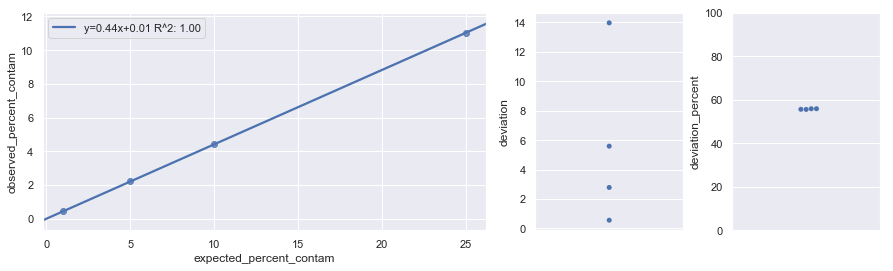

In [7]:
# plot matching data

# linear regression
slope, intercept, r_value, p_value, std_err = linregress(matching['expected_percent_contam'], matching['observed_percent_contam'])


sns.set()
f, axes = plt.subplots(1,3, figsize = [15,4], gridspec_kw  = { 'width_ratios' : [3,1,1]})
ax = sns.regplot(x="expected_percent_contam", y="observed_percent_contam", data=matching, ax=axes[0], line_kws={'label':"y={0:.2f}x+{1:.2f} R^2: {2:.2f}".format(slope,intercept, r_value)})
ax.legend()
sns.swarmplot(y="deviation", data=matching, ax=axes[1])
ax = sns.swarmplot(y="deviation_percent", data=matching, ax=axes[2])
ax.set(ylim=(0, 100))

In [8]:
# stats BUT NEED MORE NUMBERS
ttest_rel(matching['expected_percent_contam'], matching['observed_percent_contam'])

Ttest_relResult(statistic=1.9500859338886853, pvalue=0.14626149175208752)

In [9]:
describe(matching['deviation'])

DescribeResult(nobs=4, minmax=(0.55568, 13.97074), mean=5.724235, variance=34.465723647366666, skewness=0.755653075182051, kurtosis=-0.9746310082672993)